# 📊 Project: Predicting Customer Response to Promotional Offers

## 1. Import Required Libraries
In this cell, we load all the essential Python libraries for data processing, visualization, preprocessing, model building, and evaluation:

- **pandas, numpy**: Data manipulation and numerical computations  
- **seaborn, matplotlib**: Data visualization  
- **collections.Counter**: Counting frequency of values  
- **train_test_split, RandomizedSearchCV**: Splitting datasets and performing randomized hyperparameter search  
- **SMOTETomek**: Handling class imbalance by combining SMOTE oversampling and Tomek Links undersampling  
- **KNeighborsClassifier, LogisticRegression, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, RandomForestClassifier**: Machine learning classification algorithms  
- **f1_score, precision_score, recall_score, confusion_matrix, classification_report**: Model evaluation metrics


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, classification_report

## 2. Load Dataset
In this cell, we load the historical marketing campaign dataset from an Excel file into a **pandas DataFrame**.  
The dataset contains standardized numerical features and encoded categorical variables related to customer behavior during previous promotional campaigns.

- **pd.read_excel()**: Reads the Excel file from the `dataset/` directory  
- **df.head()**: Displays the first 5 rows to preview the structure and contents of the dataset


In [5]:
df = pd.read_excel("dataset/marketing_campaign.xlsx")

df.head()

,age,default,balance,housing,loan,day,duration,y
0,1.606965,0,0.256419,1,0,-1.298476,0.011016,0
1,0.288529,0,-0.437895,1,0,-1.298476,-0.416127,0
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.707361,0
3,0.571051,0,0.047205,1,0,-1.298476,-0.645231,0
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.233620,0


## 3. Dataset Overview and Label Distribution

This cell provides a basic overview of the dataset:

- Prints the total number of data examples (rows) in the dataset.  
- Checks and prints the count of missing values in each column to identify any incomplete data.  
- Displays the distribution of the target label `y` by counting the number of 0s and 1s, which indicates the class balance for the promotional offer uptake.


In [6]:
print(f'Number of data examples: {df.shape[0]}')
missing_count = df.isnull().sum()
print(f"Number of unlabeled rows in all the columns:\n{missing_count}")
print('-' * 33)
print("Number of 0 and 1 in the label y:")
print(df['y'].value_counts())

Number of data examples: 45211
Number of unlabeled rows in all the columns:
age         0
default     0
balance     0
housing     0
loan        0
day         0
duration    0
y           0
dtype: int64
---------------------------------
Number of 0 and 1 in the label y:
y
0    39922
1     5289
Name: count, dtype: int64


## 4. Visualizing the Target Label Distribution

This cell creates a bar plot to visualize the distribution of the target variable `y` (customer decision):

- Uses **Seaborn's countplot** to show the number of customers who accepted (1) versus those who did not accept (0) the promotional offer.  
- Sets plot title and axis labels for clarity.  
- Helps in understanding the class imbalance visually.


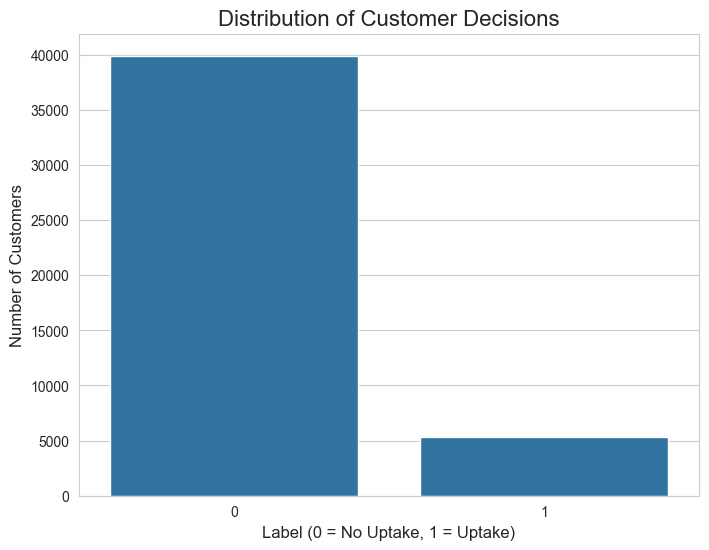

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='y', data=df)

ax.set_title('Distribution of Customer Decisions', fontsize=16)
ax.set_xlabel('Label (0 = No Uptake, 1 = Uptake)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

plt.show()

## 5. Preparing Features and Splitting the Dataset

- Separates the features (`X`) from the target label (`y`).  
- Splits the dataset into training and testing sets with an 80-20 ratio.  
- Uses **stratified splitting** to maintain the same class distribution in both train and test sets.  
- Sets a random seed (`random_state=42`) for reproducibility.  
- Prints the shapes of the resulting training and testing feature sets to confirm the split.


In [8]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (36168, 7)
Shape of X_test: (9043, 7)


## 6. Model Training and Evaluation

- Defines a dictionary of five classification models to evaluate:
  - Logistic Regression  
  - K-Nearest Neighbors (KNN)  
  - Linear Discriminant Analysis (LDA)  
  - Quadratic Discriminant Analysis (QDA)  
  - Random Forest Classifier  

- For each model:
  - Fits the model on the training data.  
  - Predicts the target on the test set.  
  - Calculates key performance metrics: F1-score, Precision, and Recall.  
  - Plots a confusion matrix heatmap to visualize prediction performance.  

- Collects all results into a DataFrame for side-by-side comparison.  
- Prints a summary table showing F1, Precision, and Recall scores for each model.


--- Evaluating: Logistic Regression ---


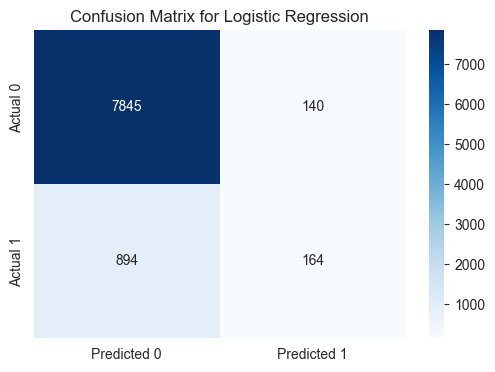

--- Evaluating: K-Nearest Neighbors ---


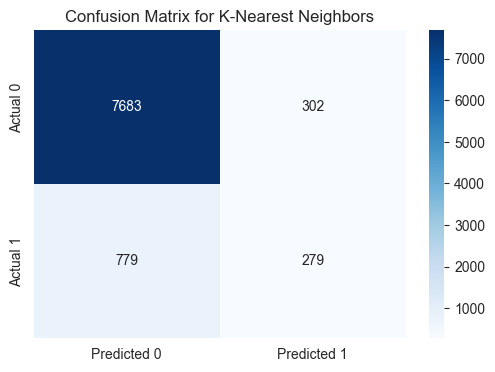

--- Evaluating: Linear Discriminant Analysis ---


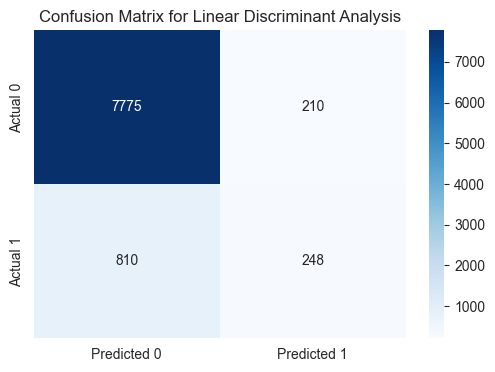

--- Evaluating: Quadratic Discriminant Analysis ---


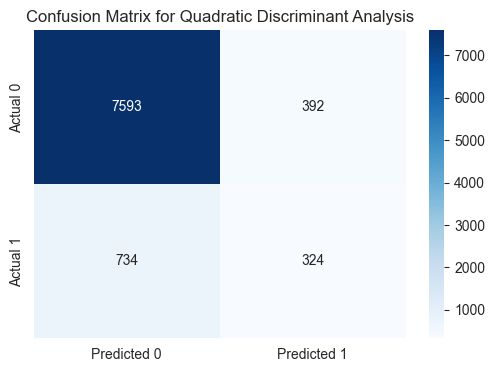

--- Evaluating: Random Forest ---


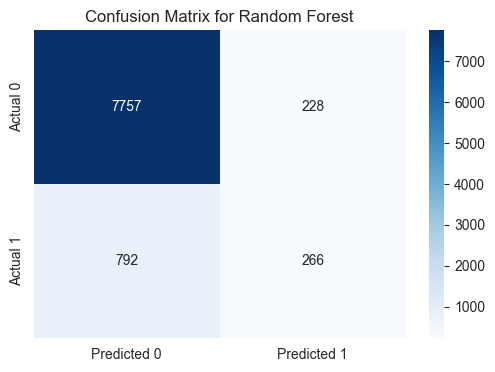

--- Summary of F1, Precision, and Recall ---


,F1-Score,Precision,Recall
Logistic Regression,0.240822,0.539474,0.155009
K-Nearest Neighbors,0.340451,0.480207,0.263705
Linear Discriminant Analysis,0.327177,0.541485,0.234405
Quadratic Discriminant Analysis,0.365276,0.452514,0.306238
Random Forest,0.342784,0.538462,0.251418


In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"--- Evaluating: {model_name} ---")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    results[model_name] = {
        "F1-Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    

results_df = pd.DataFrame(results).T
print("--- Summary of F1, Precision, and Recall ---")
results_df

## 7. Handling Class Imbalance with SMOTETomek

- Prints the original class distribution in the training set to identify imbalance.  
- Applies **SMOTETomek**, a hybrid method combining:
  - **SMOTE** (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.  
  - **Tomek Links** undersampling to clean overlapping examples and improve class separation.  

- Resamples the training data to create a more balanced dataset.  
- Prints the new class distribution after resampling to verify the effect of balancing.


In [9]:
print(f"Original training set distribution: {Counter(y_train)}")

sampler = SMOTETomek(random_state=42)

X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

print(f"Resampled training set distribution: {Counter(y_resampled)}")

Original training set distribution: Counter({0: 31937, 1: 4231})
Resampled training set distribution: Counter({0: 31356, 1: 31356})


## 8. Model Training and Evaluation on Resampled Data

- Uses the balanced training set obtained from **SMOTETomek** resampling.  
- Trains each classification model again on the resampled (balanced) training data.  
- Predicts on the original test set (unseen data).  
- Calculates and stores F1-score, Precision, and Recall metrics to compare performance improvements.  
- Plots confusion matrices for each model to visually assess prediction accuracy and error distribution.  
- Displays a summary table of evaluation metrics to compare results before and after resampling.


--- Evaluating: Logistic Regression ---


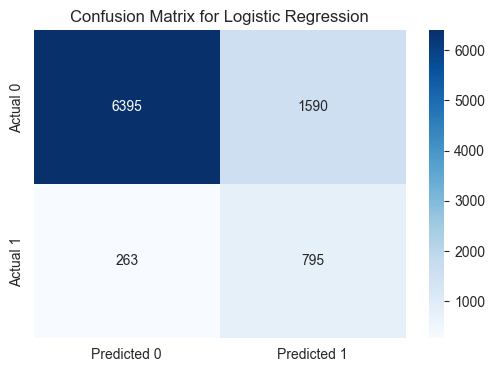

--- Evaluating: K-Nearest Neighbors ---


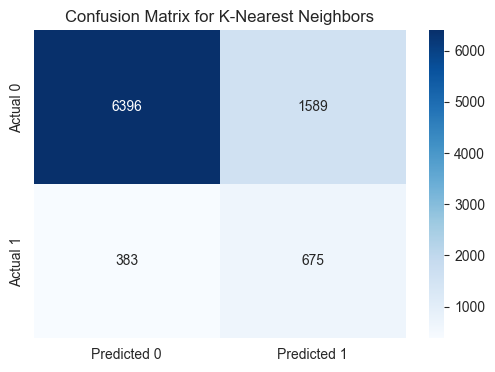

--- Evaluating: Linear Discriminant Analysis ---


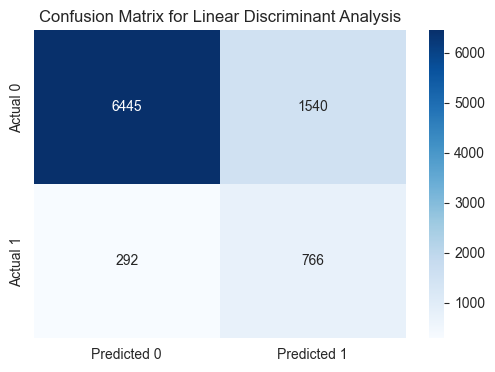

--- Evaluating: Quadratic Discriminant Analysis ---


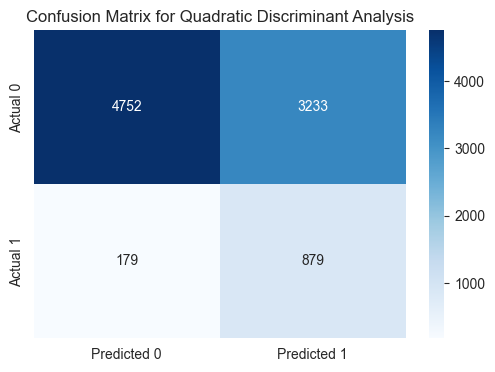

--- Evaluating: Random Forest ---


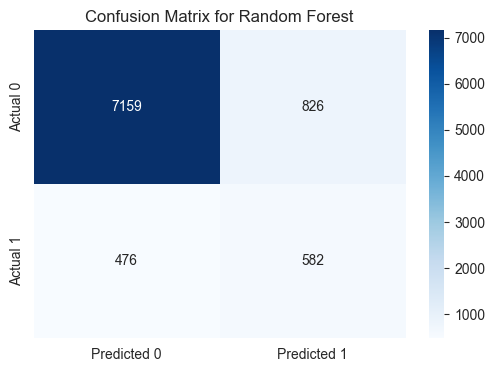

--- Summary of F1, Precision, and Recall ---


,F1-Score,Precision,Recall
Logistic Regression,0.461807,0.333333,0.751418
K-Nearest Neighbors,0.406382,0.298145,0.637996
Linear Discriminant Analysis,0.455410,0.332177,0.724008
Quadratic Discriminant Analysis,0.340039,0.213765,0.830813
Random Forest,0.472019,0.413352,0.550095


In [35]:
resampled_results = {}

for model_name, model in models.items():
    print(f"--- Evaluating: {model_name} ---")
    
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store metrics
    resampled_results[model_name] = {
        "F1-Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }
    
    # --- Confusion Matrix Calculation and Plotting ---
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    

# Display final summary DataFrame
resampled_results_df = pd.DataFrame(resampled_results).T
print("--- Summary of F1, Precision, and Recall ---")
resampled_results_df.head()

## 9. Hyperparameter Tuning of Random Forest using RandomizedSearchCV

- Defines a parameter grid with various options for:
  - Number of trees (`n_estimators`)  
  - Maximum tree depth (`max_depth`)  
  - Minimum samples to split a node (`min_samples_split`)  
  - Minimum samples at a leaf node (`min_samples_leaf`)  
  - Bootstrap sampling (`bootstrap`)  

- Sets up a **RandomizedSearchCV** with:
  - 300 random parameter combinations sampled (`n_iter=300`)  
  - 3-fold cross-validation (`cv=3`)  
  - F1-score as the scoring metric  
  - Parallel processing (`n_jobs=-1`) for faster execution  

- Fits the randomized search on the resampled (balanced) training data to find the best hyperparameters.  
- Prints the best parameters found after tuning.  
- Retrieves the best Random Forest model and makes predictions on the test set.  
- Evaluates the tuned model with a classification report (precision, recall, F1-score) and plots its confusion matrix to visualize performance.


Starting hyperparameter tuning...
Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 216 is smaller than n_iter=300. Running 216 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning finished.

Best Parameters Found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}

--- Performance of Fine-Tuned Random Forest ---
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7985
           1       0.42      0.49      0.45      1058

    accuracy                           0.86      9043
   macro avg       0.67      0.70      0.69      9043
weighted avg       0.87      0.86      0.87      9043



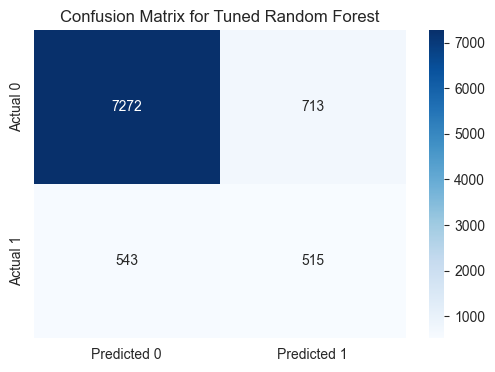

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(estimator=rf, 
                                      param_distributions=param_grid, 
                                      n_iter=300,
                                      cv=3, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1,
                                      scoring='f1')


print("Starting hyperparameter tuning...")
rf_random_search.fit(X_resampled, y_resampled)
print("Tuning finished.")


print("\nBest Parameters Found:")
print(rf_random_search.best_params_)

best_rf_model = rf_random_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

print("\n--- Performance of Fine-Tuned Random Forest ---")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Tuned Random Forest')
plt.show()

## 10. Importing PyTorch Libraries for Neural Network

In this step, we prepare the environment for building and training a **Neural Network** using PyTorch:

These libraries will allow us to design, train, and evaluate a neural network classifier on the dataset.


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchinfo

## 11. Convert Data to PyTorch Tensors

- Transform training/test sets into `torch.Tensor` format (`float32`).  
- Use `.unsqueeze(1)` on labels to match `(N,1)` shape for binary classification.  
- Print shapes to confirm dimensions before model building.  


In [11]:
X_train_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

print(f"Shape of X_train_tensor: {X_train_tensor.shape}")
print(f"Shape of y_train_tensor: {y_train_tensor.shape}")

Shape of X_train_tensor: torch.Size([62712, 7])
Shape of y_train_tensor: torch.Size([62712, 1])


## 12. Define Neural Network Architecture

- **CustomerUptakeNet**: simple feedforward NN for binary classification.  
- Layers: Input → 64 → Dropout(0.5) → 32 → Output(1).  
- Activations: ReLU in hidden layers, Sigmoid at output.  


In [115]:
class CustomerUptakeNet(nn.Module):
    def __init__(self, input_features):
        super(CustomerUptakeNet, self).__init__()
        self.layer1 = nn.Linear(input_features, 64)
        self.dropout1 = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

## 13. Initialize Model, Loss, and Optimizer

- Create `CustomerUptakeNet` with 7 input features.  
- Use **BCELoss** for binary classification.  
- Optimizer: **Adam** with learning rate `0.1` and L2 regularization (`weight_decay=1e-4`).  
- Display model summary using `torchinfo`.  


In [116]:
model = CustomerUptakeNet(input_features=7)

loss_func = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-4)
torchinfo.summary(model)

Layer (type:depth-idx)                   Param #
CustomerUptakeNet                        --
├─Linear: 1-1                            512
├─Dropout: 1-2                           --
├─Linear: 1-3                            2,080
├─Linear: 1-4                            33
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0

## 14. Training Function

- Moves model and data to **CPU/GPU


In [117]:
def train(epochs, model, loss_function, optimizer, X_train, y_train, X_val, y_val):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Move all data and the model to the device
    model.to(device)
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_val, y_val = X_val.to(device), y_val.to(device)
    
    print("Starting training...")
    for epoch in range(epochs):
        model.train() # Set the model to training mode
        
        # Training step
        y_pred = model(X_train)
        loss = loss_function(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # --- Validation Step ---
        if (epoch + 1) % 20 == 0:
            model.eval()
            with torch.no_grad():
                val_preds = model(X_val)
                val_loss = loss_function(val_preds, y_val)
                
                predicted = (val_preds > 0.5).float()
                correct = (predicted == y_val).sum().item()
                accuracy = correct / y_val.size(0)
            
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {accuracy:.4f}')

    print("Training finished.")
    return model

## 15. Train the Neural Network

- Trains the model for **500 epochs** using the defined training loop.  
- Monitors train loss, validation loss, and accuracy every 20 epochs.  
- Returns the final trained model.  


In [118]:
trained_model = train(500, model, loss_func, optimizer, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

Using device: cuda
Starting training...
Epoch [20/500], Train Loss: 0.4871, Val Loss: 0.4914, Val Accuracy: 0.7287
Epoch [40/500], Train Loss: 0.4677, Val Loss: 0.4866, Val Accuracy: 0.7657
Epoch [60/500], Train Loss: 0.4564, Val Loss: 0.4859, Val Accuracy: 0.7724
Epoch [80/500], Train Loss: 0.4459, Val Loss: 0.4931, Val Accuracy: 0.7678
Epoch [100/500], Train Loss: 0.4410, Val Loss: 0.4863, Val Accuracy: 0.7739
Epoch [120/500], Train Loss: 0.4385, Val Loss: 0.4862, Val Accuracy: 0.7708
Epoch [140/500], Train Loss: 0.4380, Val Loss: 0.4776, Val Accuracy: 0.7713
Epoch [160/500], Train Loss: 0.4369, Val Loss: 0.4696, Val Accuracy: 0.7716
Epoch [180/500], Train Loss: 0.4370, Val Loss: 0.4410, Val Accuracy: 0.7865
Epoch [200/500], Train Loss: 0.4373, Val Loss: 0.4510, Val Accuracy: 0.7841
Epoch [220/500], Train Loss: 0.4376, Val Loss: 0.4578, Val Accuracy: 0.7720
Epoch [240/500], Train Loss: 0.4360, Val Loss: 0.5047, Val Accuracy: 0.7538
Epoch [260/500], Train Loss: 0.4351, Val Loss: 0.463

### 16. PyTorch Model Evaluation Function
This helper function evaluates the trained neural network. It sets the model to evaluation mode (`model.eval()`), makes predictions on the test data, and then calculates and prints the final F1-score and accuracy. It also plots a confusion matrix to visualize the results.

In [119]:
def evaluate(model, X_test, y_test):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    model.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    model.eval()
    
    with torch.no_grad():
        y_pred_tensor = model(X_test)
        y_pred_binary = (y_pred_tensor > 0.5).float()

    y_pred_np = y_pred_binary.cpu().numpy()
    y_test_np = y_test.cpu().numpy()
    
    print(f"\n--- F1-Score:{f1_score(y_test_np, y_pred_np)} ---")
    print(f"--- Accuracy:{accuracy_score(y_test_np, y_pred_np)} ---\n")
    
    cm_pytorch = confusion_matrix(y_test_np, y_pred_np)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_pytorch, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix for PyTorch Model')
    plt.show()

### Execute Model Evaluation
This cell calls the `evaluate` function defined previously. It passes the final `trained_model` and the test data tensors (`X_test_tensor`, `y_test_tensor`) to generate the model's final performance report and confusion matrix.


--- F1-Score:0.45904255319148934 ---
--- Accuracy:0.7750746433705629 ---



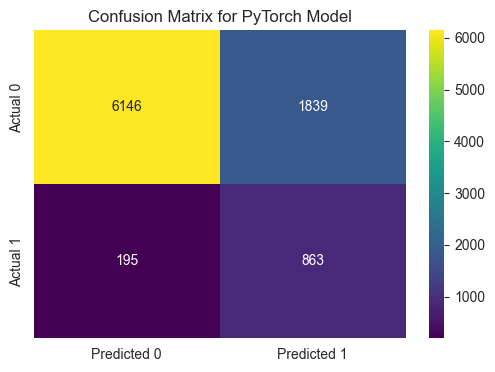

In [123]:
evaluate(trained_model, X_test_tensor, y_test_tensor)